In [4]:
a=open('canvas.py','w')
a.write('''def pixcel_make(r, g, b):
    return (r, g, b)

def make(xsize, ysize):
    canvas = []
    for y in range(ysize):
        canvas.append([])
    for y in range(ysize):
        for x in range(xsize):
            canvas[y].append(pixcel_make(240, 240, 240))
    return canvas

def pset(canvas, x, y, r, g, b):
    height = len(canvas)
    if( y<0 or y >= height ):
        return
    width = len(canvas[y])
    if( x < 0 or x >= width ):
        return
    canvas[y][x] = pixcel_make(r, g, b)

from PIL import Image
import numpy as np
from IPython.display import display_png, clear_output

def show(canvas):
    return Image.fromarray(np.array(canvas, dtype='uint8'))

def show2(canvas):
    display_png(show(canvas))

def _line1(canvas, x0, y0, x1, y1, r, g, b):
    width  = x1 - x0
    height = y1 - y0
    slope = height/width
    for i in range(width):
        x = x0 + i
        y = y0 + int(i*slope+0.5)
        pset(canvas, x, y, r, g, b)

def _line2(canvas, x0, y0, x1, y1, r, g, b):
    width  = x1 - x0
    height = y1 - y0
    slope = width/height
    for i in range(height):
        x = x0 + int(i*slope+0.5)
        y = y0 + i
        pset(canvas, x, y, r, g, b)

def line(canvas, x0, y0, x1, y1, r, g, b):
    if abs(x1 - x0) < abs(y1 - y0):
        if y0 > y1:
            _line2(canvas, x1, y1, x0, y0, r, g, b)
        else:
            _line2(canvas, x0, y0, x1, y1, r, g, b)
    elif x0 > x1:
        _line1(canvas, x1, y1, x0, y0, r, g, b)
    elif x0 < x1:
        _line1(canvas, x0, y0, x1, y1, r, g, b)''')


1524

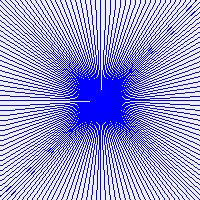

In [7]:
# 上記のファイルcanvas.pyが同じフォルダにある場合は、このコードで線が表示される
import canvas
c = canvas.make(200, 200)
for i in range(0, 210, 5):
    canvas.line(c, i, 0, 200-i, 200, 0, 0, 255)
    canvas.line(c, 0, i, 200, 200-i, 0, 0, 255)

canvas.show(c)

In [8]:
# 中心(0, 0) 半径1の円の、yが正の部分
import math
def f(x):
    return math.sqrt(1 - x**2)

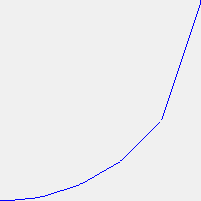

In [9]:
# 小数を含む座標をscale倍して線を描画する関数
def scale_line(c, x1, y1, x2, y2, r, g, b, scale):
    return canvas.line(c, int(x1*scale+0.5), int(y1*scale+0.5), int(x2*scale+0.5), int(y2*scale+0.5), r, g, b)

# 0 <= x <= 1 の範囲をn個に区切り、f(x)を折れ線で描画する関数。scaleは拡大する倍率(整数)。
def draw_f(c, n, scale, r, g, b):
    for i in range(n):
        x1 = i / n
        x2 = (i + 1) / n
        scale_line(c, x1, f(x1), x2, f(x2), r, g, b, scale)

# スケール200倍
sc = 200
def cmake():
    # 適切なサイズのキャンバスを返す
    return canvas.make(sc + 1, sc + 1)

# 関数f(x)を5本の折れ線で粗く描く
c = cmake()
draw_f(c, 5, sc, 0, 0, 255)
canvas.show(c)

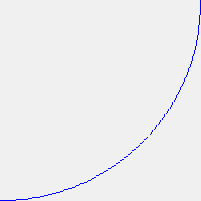

In [10]:
# もっと細かく50に区切って描く。
c = cmake()
draw_f(c, 50, sc, 0, 0, 255)
canvas.show(c)

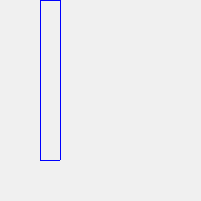

In [12]:
# キャンバスcに、(x,0)から幅w 高さhの長方形を描画する。
import canvas
def rect(c, x, w, h, r, g, b, scale):
    # この続きを書く    
    scale_line(c, x+w, 0, x+w, h, r, g, b, sc)
    scale_line(c, x, 0, x, h, r, g, b, sc)
    scale_line(c, x, 0, x+w, 0, r, g, b, sc)
    scale_line(c, x, h, x+w, h, r, g, b, sc)
# 例: x=0.2から幅0.1, 高さ0.8の長方形を青で描画する。
c = cmake()
rect(c, 0.2, 0.1, 0.8, 0, 0, 255, sc)
canvas.show(c)

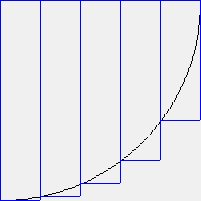

In [13]:
# f(x)を折れ線でなく長方形を並べて描画する。
def draw_f_rect(canvas, n, scale, r, g, b):
    for i in range(n):
        # この続きを書く
        x1 = i/n
        x2 = 1/n
        rect(c, x1, x2, f(x1), r, g, b, scale)    
c = canvas.make(sc + 1, sc + 1)
draw_f(c, 50, sc, 0, 0, 0)  # 折れ線
draw_f_rect(c, 5, sc, 0, 0, 255) #長方形5個
canvas.show(c)

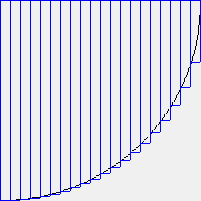

In [14]:
# もっと細かい例
c = cmake()
draw_f(c, 50, sc, 0, 0, 0)  # 折れ線
draw_f_rect(c, 20, sc, 0, 0, 255) #長方形20個
canvas.show(c)

In [15]:
def area_f_rect(n):
    area = 0
    for i in range(n):
        # この続きを書く
        x = i / n
        wid = 1 / n
        hei = f(x)
        area = area + wid * hei 
    return(area)
area_f_rect(100) * 4

3.160417031779047

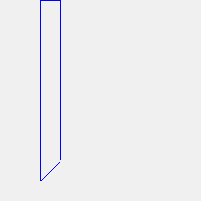

In [16]:
# キャンバスcに、(x,0)から幅w 高さh1, h2の台形を描画する。
def daikei(c, x, w, h1, h2, r, g, b, scale):
    # この続きを書く
    scale_line(c, x, 0, x+w, 0, r, g, b, sc)
    scale_line(c, x, 0, x, h1, r, g, b, sc)
    scale_line(c, x+w, 0, x+w, h2, r, g, b, sc)
    scale_line(c, x, h1, x+w, h2, r, g, b, sc)
# 例: x=0.2から幅0.1, 高さ0.9と0.8の台形を青で描画する。
c = cmake()
daikei(c, 0.2, 0.1, 0.9, 0.8, 0, 0, 255, sc)
canvas.show(c)

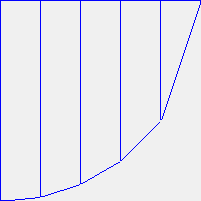

In [17]:
# daikeiを用い、台形を並べてグラフを描く関数
def draw_f_daikei(c, n, scale, r, g, b):
    for i in range(n):
        x1 = i / n
        x2 = (i + 1) / n
        daikei(c, x1, 1/n, f(x1), f(x2), r, g, b, scale)

c = cmake()
draw_f_daikei(c, 5, sc, 0, 0, 255)
canvas.show(c)

In [18]:
def area_f_daikei(n):
    # この後を書く
    area=0
    for i in range(n):
        area+=(f(i/n)+f((i+1)/n))/n/2
    return area

area_f_daikei(100) * 4

3.140417031779045

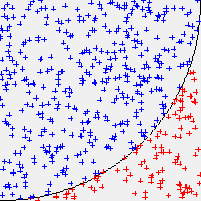

In [19]:
import random
# (x, y) の位置に十字線を描く
def dot(c, x, y, r, g, b, scale):
    size = scale/15000
    scale_line(c, x-size, y, x+size, y, r, g, b, scale)
    scale_line(c, x, y-size, x, y+size, r, g, b, scale)

def draw_f_random_dot(c, n, scale):
    for i in range(n):
        x = random.random()
        y = random.random()
        if y <= f(x):
            dot(c, x, y, 0, 0, 255, scale)  # 内側や線上は青
        else:
            dot(c, x, y, 255, 0, 0, scale)  # 外側は赤
            
c = cmake()
draw_f(c, 50, sc, 0, 0, 0)
random.seed(0)    # いつも同じ乱数列になるよう、種を指定する
draw_f_random_dot(c, 500, sc)
canvas.show(c)

In [20]:
def area_f_random(n):
    # この後を書いて完成させる
    y1=[]
    for i in range(n):
        x=random.random()
        y=random.random()
        
        if y<= f(x):
            y1.append(y)
    w=int(len(y1))
    return w/n

# 以下を実行して試すこと
random.seed(0)
area_f_random(100000) * 4

3.14844

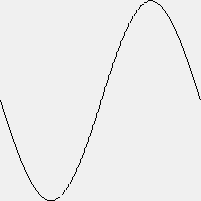

長方形近似: 0.5


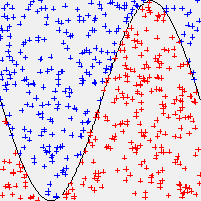

モンテカルロ: 0.5011


In [21]:
# サインカーブ
def f(x):
    return (math.sin(x * math.pi * 2) + 1) / 2

def test():
    d = cmake()
    draw_f(d, 50, sc, 0, 0, 0)  # 折れ線
    draw_f_rect(d, 20, sc, 0, 0, 255) #長方形20個
    canvas.show2(d)
    print('長方形近似: {}'.format(area_f_rect(100)))
    c = cmake()
    draw_f(c, 50, sc, 0, 0, 0)  # 折れ線
    random.seed(0)
    draw_f_random_dot(c, 500, sc)
    canvas.show2(c)
    print('モンテカルロ: {}'.format(area_f_random(10000)))
    
test()

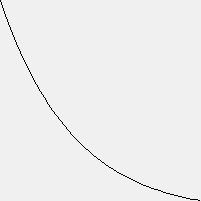

長方形近似: 0.7016746032457626


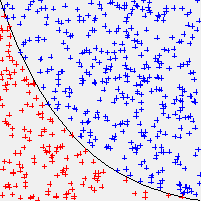

モンテカルロ: 0.7113
正確な値: 0.7066982139383011


In [22]:
# 分数関数
def f(x):
    return x * 6 / ((x + 1) * (x + 2))

test()
# 上の分数関数の、x1からx2までの積分は下のg(x2) - g(x1)で計算できる
def g(x):
    return 6 * (2 * math.log(2 + x) - math.log(1+x))

print('正確な値: {}'.format(g(1) - g(0)))

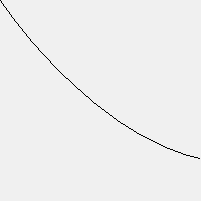

長方形近似: 0.48594492545743745


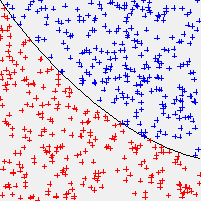

モンテカルロ: 0.4927


In [23]:
# 何やら難しい関数
def f(x):
    return x / math.log(math.tan(x) + 2)

test()

In [ ]:
#シンプソン法の関数area_simpson

In [24]:
def area_simpson(x_start, x_end, n):
    delta=x_end-x_start
    w=delta/n
    area=(f(x_start)+f(x_end))
    for i in range(n):
        a=x_start+w*(i+0.5)
        b=x_start+w*(i+1)
        c=4*f(a)+2*f(b)
        area=area+c
    return w*area/6
# -1から1まで、半円の面積を求めて2倍する
def f(x):
    return math.sqrt(1 - x**2)

area_simpson(-1, 1, 10000) * 2
# 3.1415921... で始まる数になるはず

3.1415921943382306